In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as pe

pd.set_option('display.max_columns', 200)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Setting Matplotlib defaults
plt.style.use('seaborn-v0_8')
# Set Matplotlib defaults
plt.rc('figure', figsize=(8,8), dpi=200)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=15, titlepad=10)
plt.rc('animation', html='html5')
plt.tight_layout()

/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv


<Figure size 1600x1600 with 0 Axes>

In [2]:
df = pd.read_csv('/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv')

## Data Understanding

In [3]:
df.shape

(973, 15)

In [4]:
df.sample(10)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
3     25    Male         53.2        1.70      190      164           56   
783   47    Male         45.9        1.93      166      159           65   
656   28  Female         78.7        1.63      185      154           59   
855   57    Male         96.3        1.86      168      146           74   
532   40  Female         58.1        1.56      174      136           63   
212   46  Female         58.0        1.53      196      140           62   
759   44    Male         82.5        1.79      167      155           70   
841   50  Female         61.6        1.75      192      166           74   
514   53  Female         68.1        1.55      164      131           65   
5     56  Female         58.0        1.68      168      156           74   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
3                        0.59            532.0     Strength            28.8   
783                      1.29           1015.0       Cardio            29.6   
656                      1.10            847.0     Strength            31.7   
855                      1.10            795.0     Strength            27.6   
532                      0.61            415.0         Yoga            34.4   
212                      1.83           1153.0       Cardio            18.4   
759                      1.51           1159.0         HIIT            13.8   
841                      1.22            911.0     Strength            25.5   
514                      1.41            831.0         HIIT            26.1   
5                        1.59           1116.0         HIIT            15.5   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
3                      2.1                              3                 1   
783                    2.0                              3                 2   
656                    1.8                              3                 2   
855                    2.2                              3                 2   
532                    2.2                              2                 1   
212                    2.7                              4                 3   
759                    3.5                              5                 3   
841                    2.2                              4                 2   
514                    2.2                              4                 2   
5                      2.7                              5                 3   

       BMI  
3    18.41  
783  12.32  
656  29.62  
855  27.84  
532  23.87  
212  24.78  
759  25.75  
841  20.11  
514  28.35  
5    20.55

In [5]:
df.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

In [6]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

## Data Preparation

In [8]:
df = df.rename(columns={'Weight (kg)': 'Weight', 
                  'Height (m)': 'Height',
                  'Session_Duration (hours)': 'Session_Duration',
                  'Water_Intake (liters)': 'Water_Intake',
                  'Workout_Frequency (days/week)': 'Workout_Frequency'})

# Doubling checking the columns to see whether rename has applied to the df

In [9]:
df.head(3)

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male    88.3    1.71      180      157           60   
1   46  Female    74.9    1.53      179      151           66   
2   32  Female    68.1    1.66      167      122           54   

   Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
0              1.69           1313.0         Yoga            12.6   
1              1.30            883.0         HIIT            33.9   
2              1.11            677.0       Cardio            33.4   

   Water_Intake  Workout_Frequency  Experience_Level    BMI  
0           3.5                  4                 3  30.20  
1           2.1                  4                 2  32.00  
2           2.3                  4                 2  24.71

In [10]:
df.columns

Index(['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Workout_Type',
       'Fat_Percentage', 'Water_Intake', 'Workout_Frequency',
       'Experience_Level', 'BMI'],
      dtype='object')

## Feature Understanding via Data Visualization

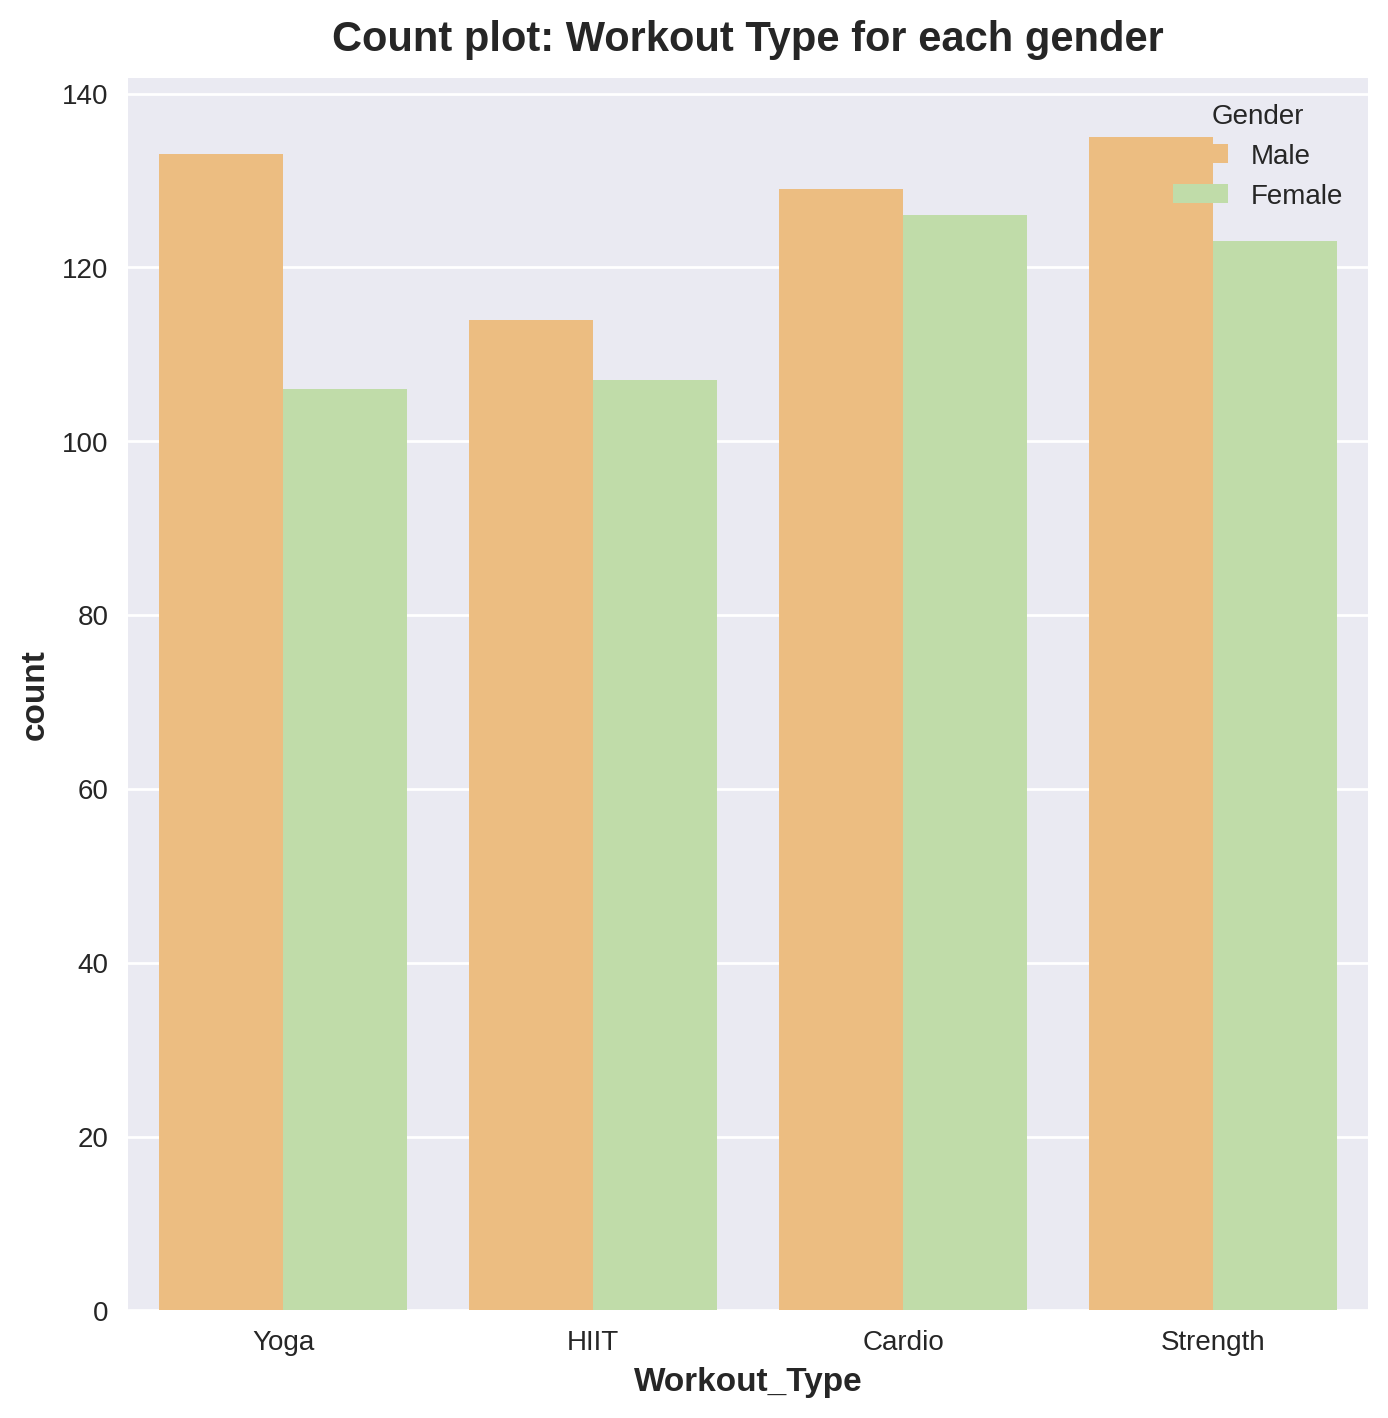

In [11]:
sns.countplot(x='Workout_Type', hue='Gender', palette='Spectral', data=df)
plt.title('Count plot: Workout Type for each gender')
plt.show()

Text(0.5, 1.0, 'Barplot: Workout Type influence on Calories Burned')

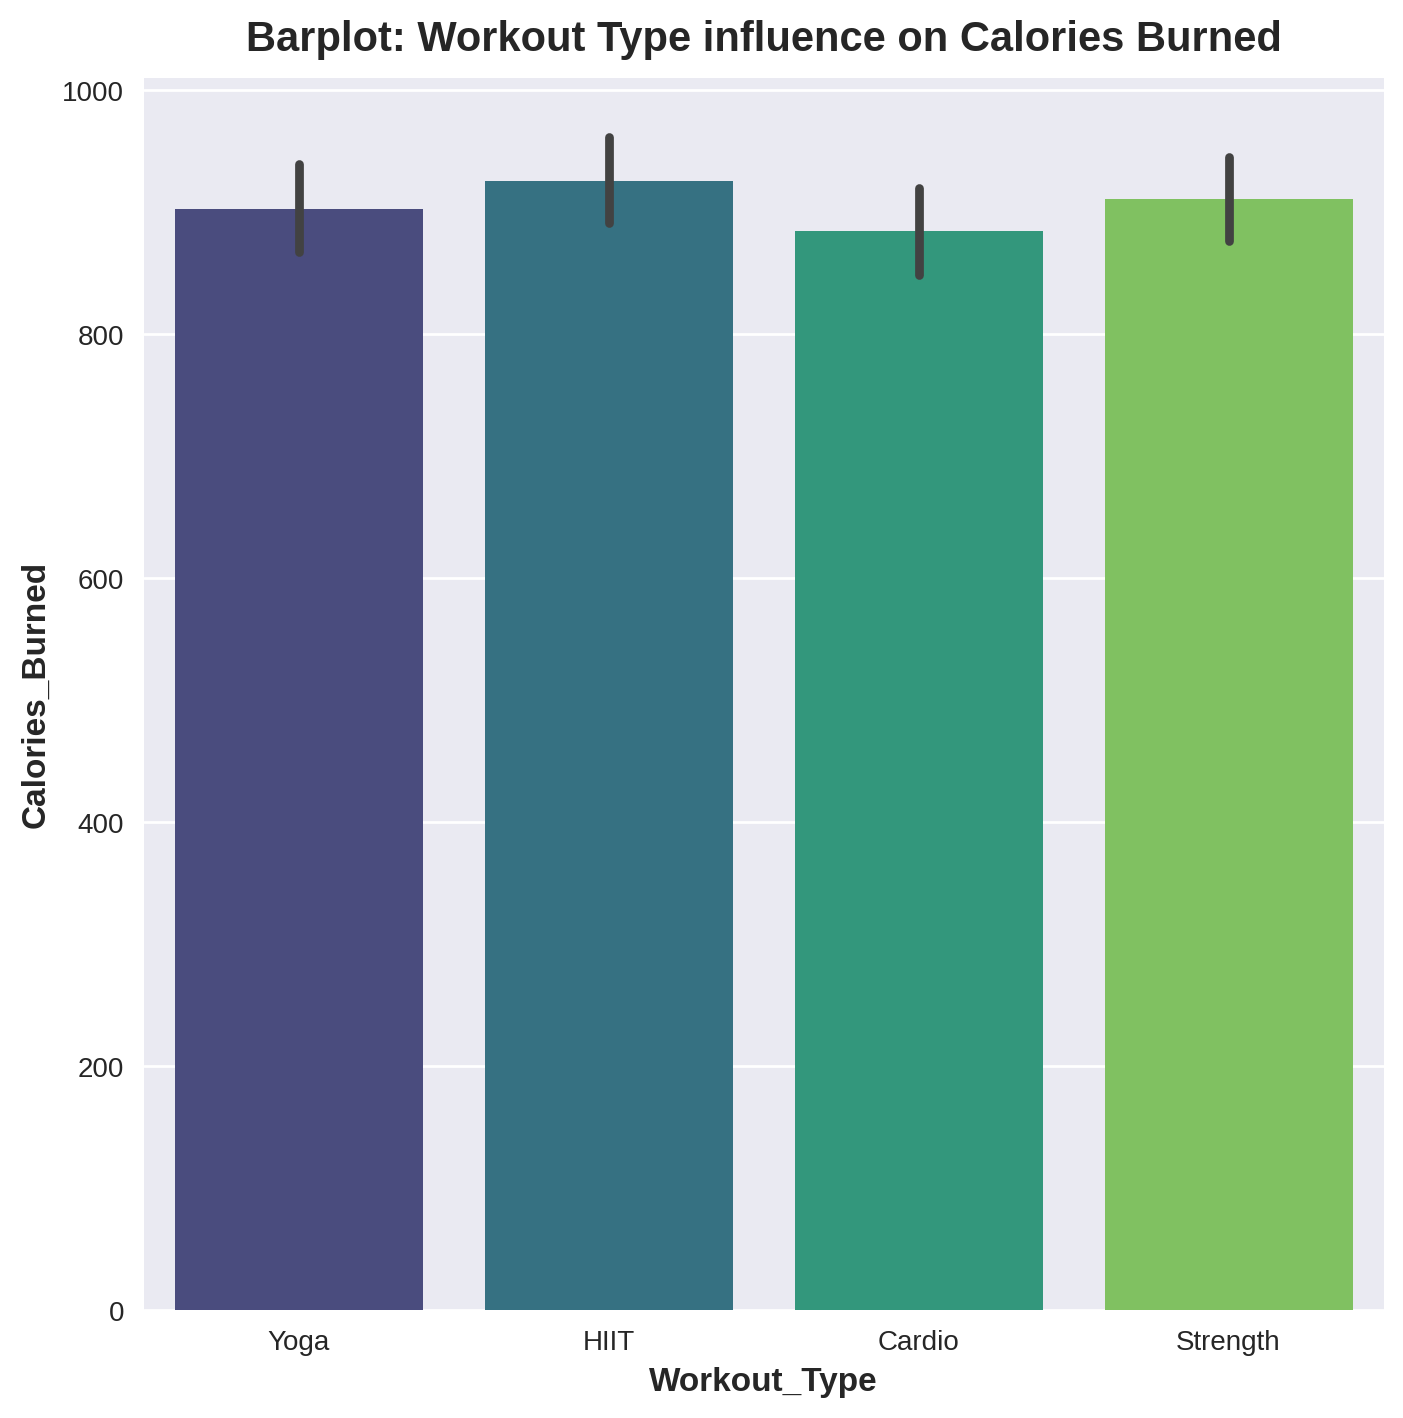

In [12]:
sns.barplot(x='Workout_Type', y='Calories_Burned', palette='viridis', data=df)
plt.title('Barplot: Workout Type influence on Calories Burned')

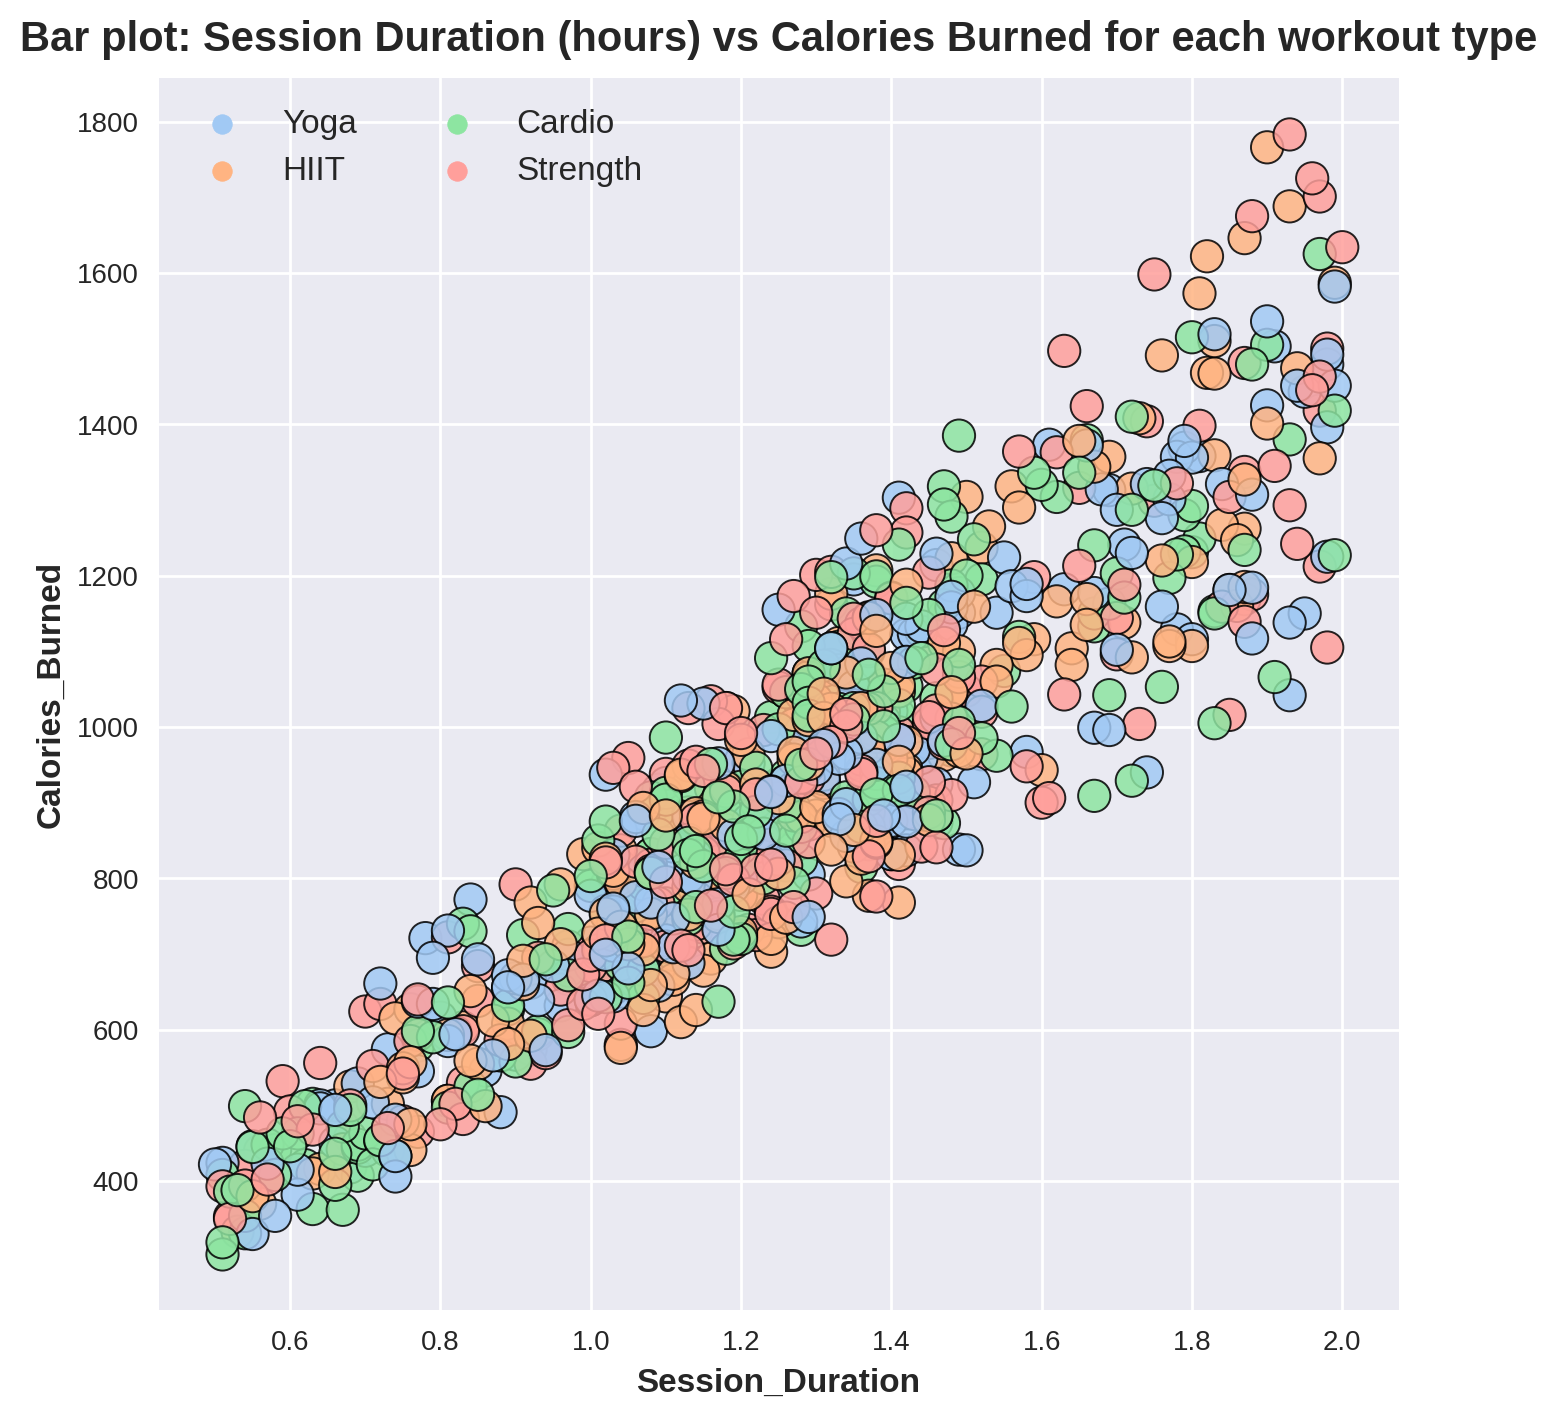

In [13]:
sns.scatterplot(x='Session_Duration', y='Calories_Burned', 
                data=df, hue='Workout_Type', palette='pastel', s=135, 
                edgecolor='black', linewidth=0.7, alpha=0.85)
plt.title("Bar plot: Session Duration (hours) vs Calories Burned for each workout type")
plt.legend(loc='upper left', fontsize='large', ncol=2)

The inferences we can make from the scatterplot is that there is a positive relationship between session duration and calories burned. The longer your session duration of the workout regardless of workout type, the more calories you burn.

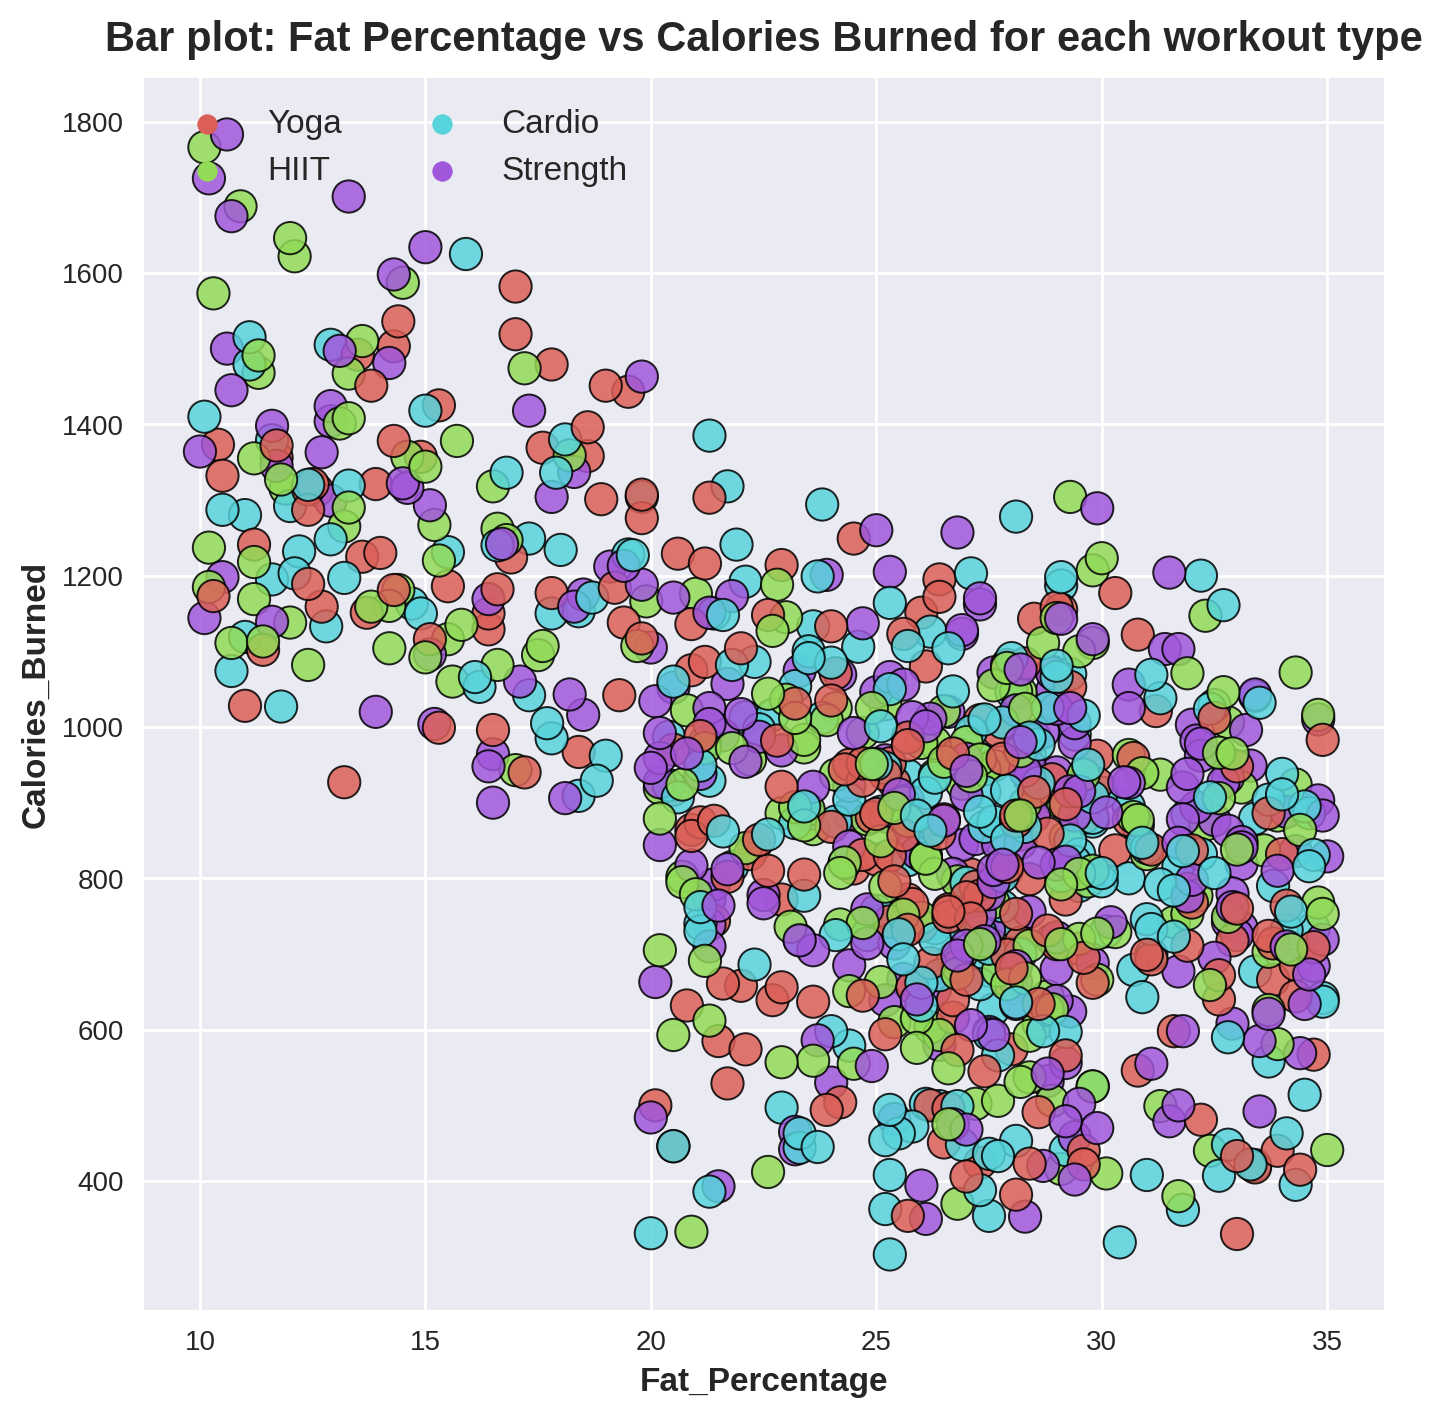

In [14]:
sns.scatterplot(x='Fat_Percentage', y='Calories_Burned', 
                data=df, hue='Workout_Type', palette='hls', s=135, 
                edgecolor='black', linewidth=0.7, alpha=0.85)
plt.title("Bar plot: Fat Percentage vs Calories Burned for each workout type")
plt.legend(loc='upper left', fontsize='large', ncol=2)

From the scatterplot above, we can deduce that there is a negative relationship between fat percentage and calories burned.

In [15]:
bin_edges = np.linspace(1.5, 3.7, num=4)

df['Water_Intake'] = pd.cut(df['Water_Intake'], bins=bin_edges, include_lowest=True, labels=False)

In [16]:
df.sample(10)

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
35    26    Male   127.6    1.73      167      160           62   
146   19  Female    73.9    1.77      198      137           64   
642   30  Female    51.5    1.74      174      150           64   
348   41  Female    62.3    1.79      181      162           73   
517   36    Male    90.3    1.65      169      158           71   
509   37  Female    55.6    1.57      182      123           53   
732   46  Female    62.5    1.54      197      125           73   
153   28  Female    52.0    1.61      168      164           70   
551   30    Male   113.4    1.91      177      137           54   
404   33  Female    55.6    1.61      161      147           54   

     Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
35               1.32           1162.0     Strength            27.3   
146              1.28            877.0     Strength            32.5   
642              1.08            810.0     Strength            33.9   
348              1.99           1451.0         Yoga            19.0   
517              1.38           1199.0       Cardio            23.7   
509              0.97            597.0       Cardio            29.2   
732              1.61            906.0     Strength            18.1   
153              1.32           1082.0         Yoga            27.9   
551              1.27            957.0         HIIT            22.2   
404              1.77           1301.0         Yoga            18.9   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  
35              1                  3                 1  42.63  
146             1                  3                 2  23.59  
642             0                  3                 2  17.01  
348             1                  5                 3  19.44  
517             2                  4                 2  33.17  
509             1                  2                 1  22.56  
732             1                  4                 3  26.35  
153             0                  3                 2  20.06  
551             2                  3                 1  31.08  
404             1                  4                 3  21.45

Text(0.5, 1.0, 'Interaction of Session and Water intake (litres) on calories burned')

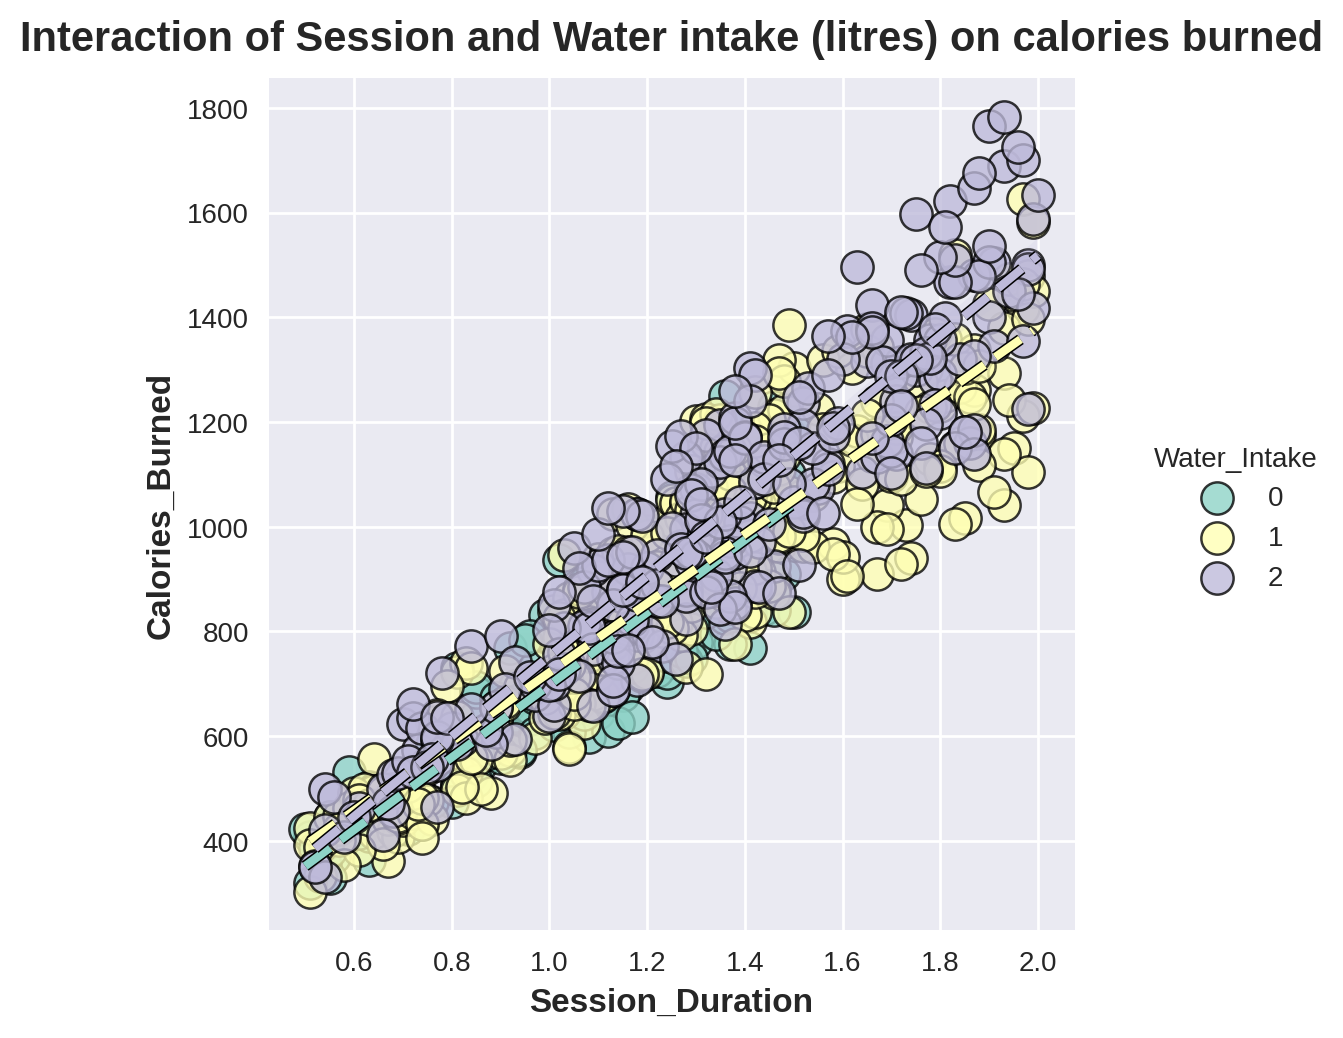

In [17]:
sns.lmplot(x='Session_Duration', y='Calories_Burned', hue='Water_Intake',
palette='Set3', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.9, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Session and Water intake (litres) on calories burned")

The inferences we can make from this lmplot is that the longer we can workout, the more water we intake while burning calories. We can notice that regression of water intake of 2 (interval between 2.96667 and 3.7 litres) is steeper than other intervals.

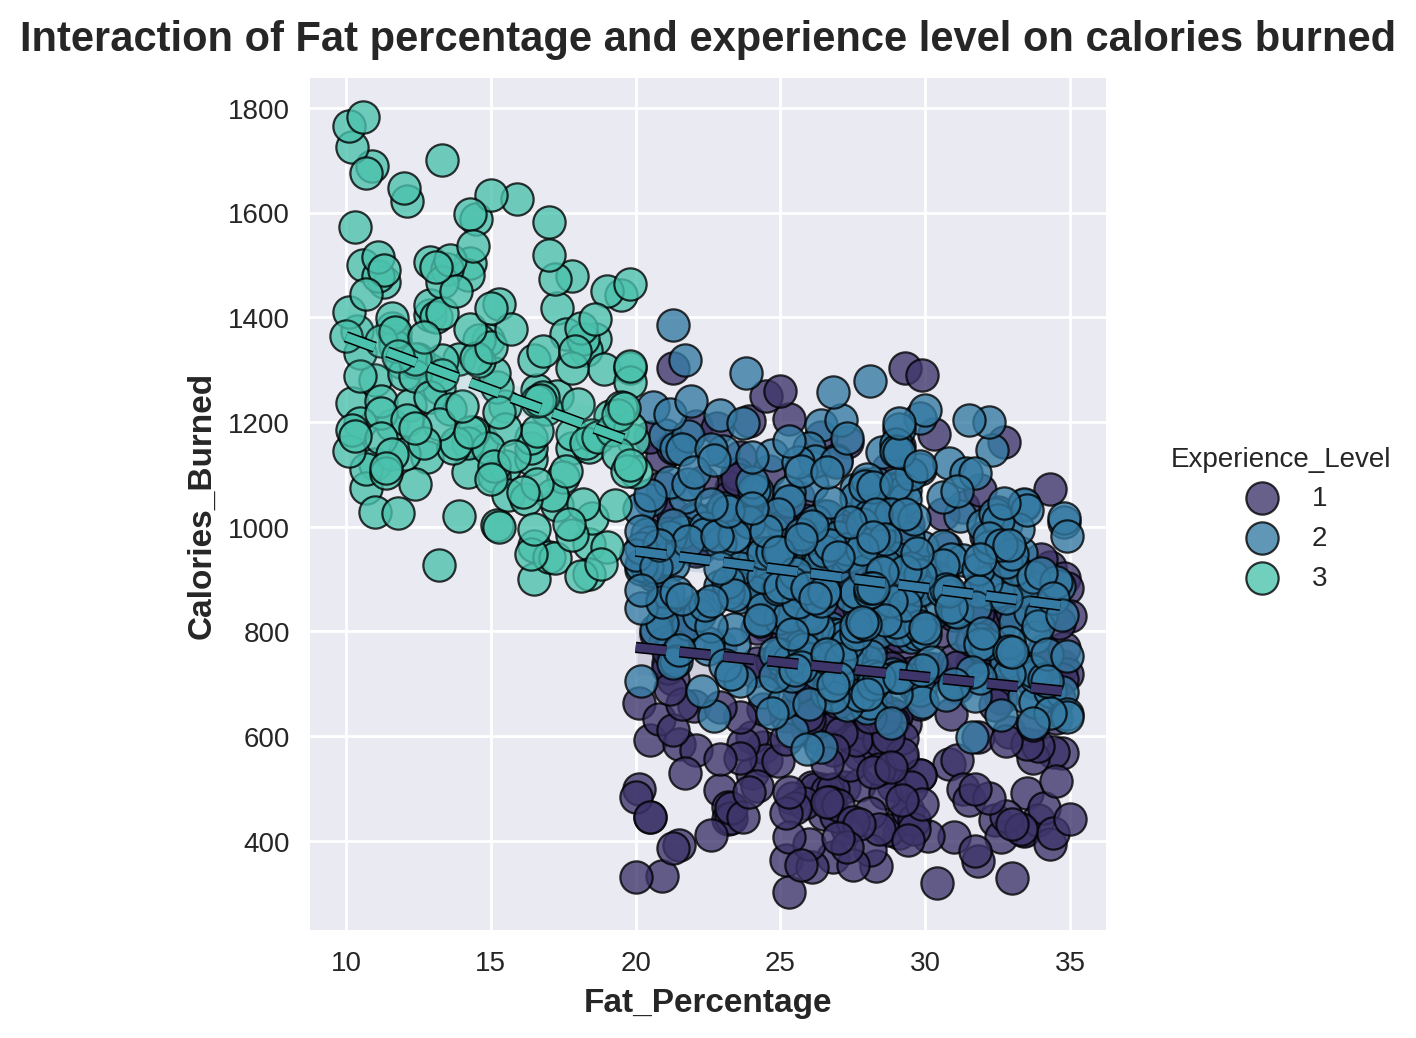

In [18]:
sns.lmplot(x='Fat_Percentage', y='Calories_Burned', hue='Experience_Level', palette='mako', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Fat percentage and experience level on calories burned")
plt.show()

As we can see from lmplot that people with more experience level, burn more calories. Since the regression line for experience level of 3 years has a steeper line as compare to other experience levels. Though lines of experience of 1 and 2 years are parallel to each other, but the line of 2 years is higher than line of 1 year. Thus, proving my inferences correct.

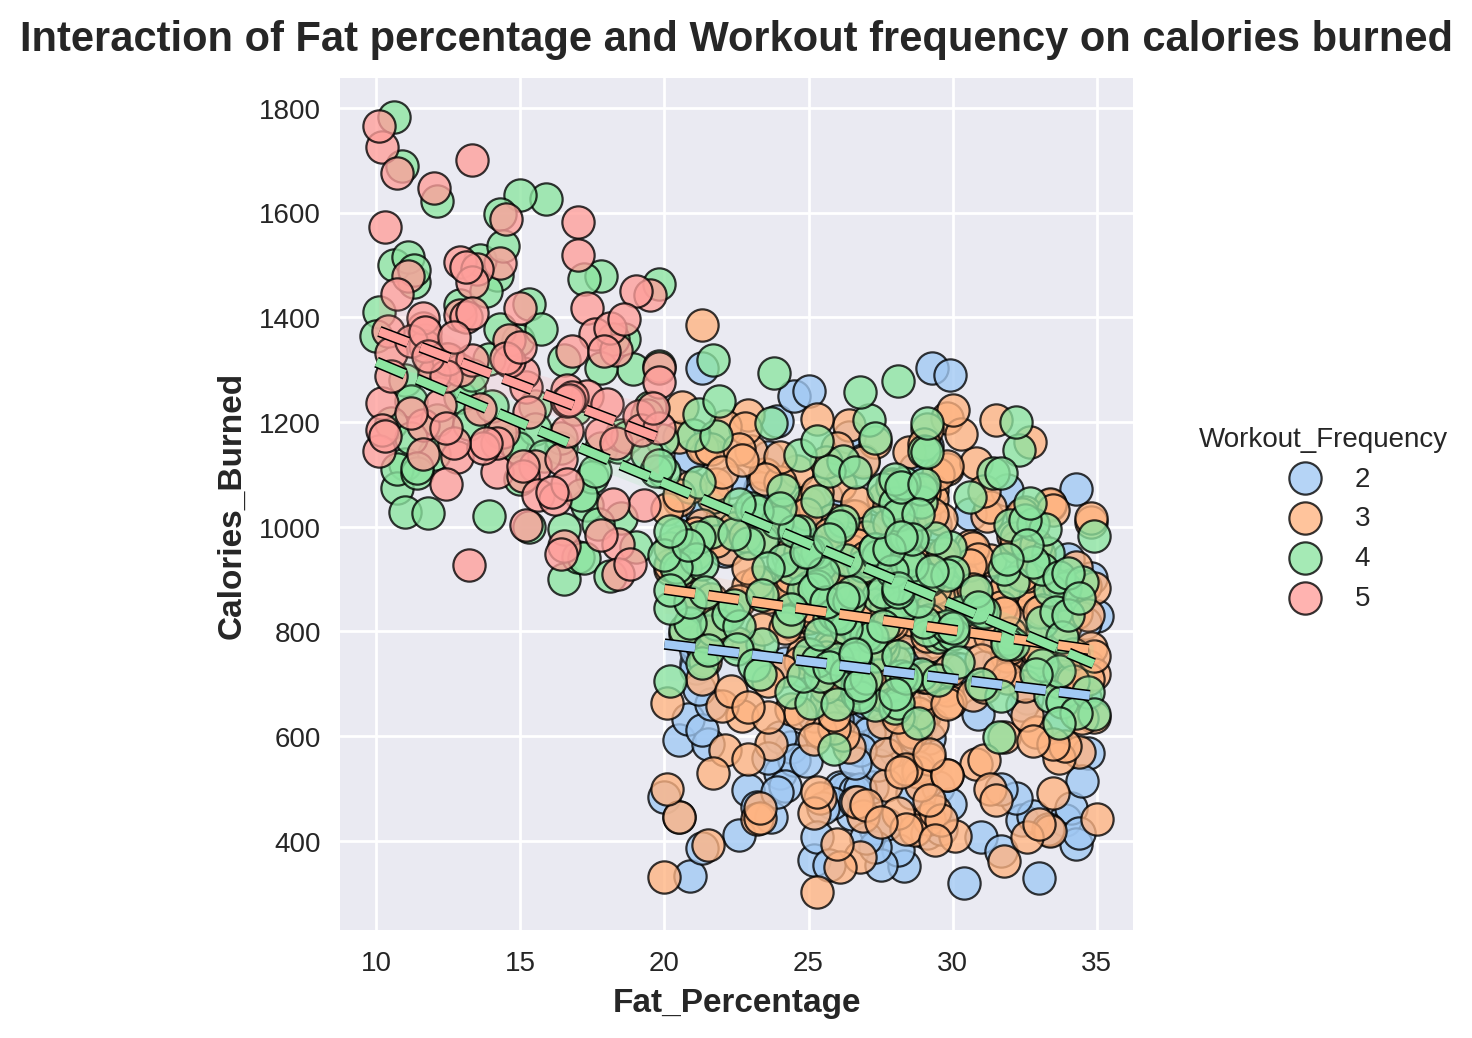

In [19]:
sns.lmplot(x='Fat_Percentage', y='Calories_Burned', hue='Workout_Frequency', palette='pastel', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Fat percentage and Workout frequency on calories burned")
plt.show()

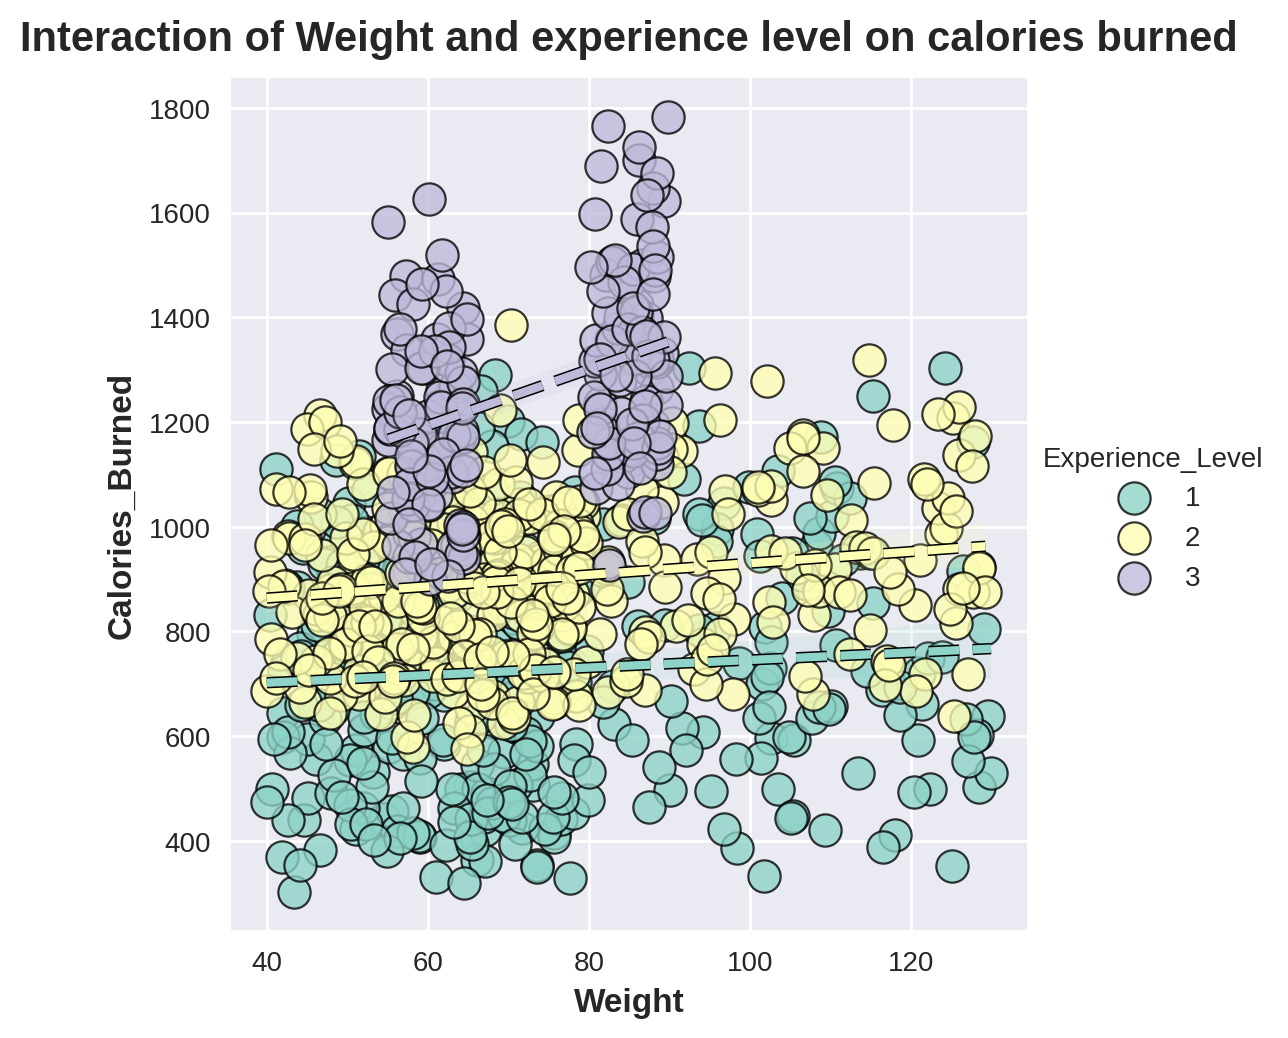

In [20]:
sns.lmplot(x='Weight', y='Calories_Burned', hue='Experience_Level', palette='Set3', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Weight and experience level on calories burned")
plt.show()

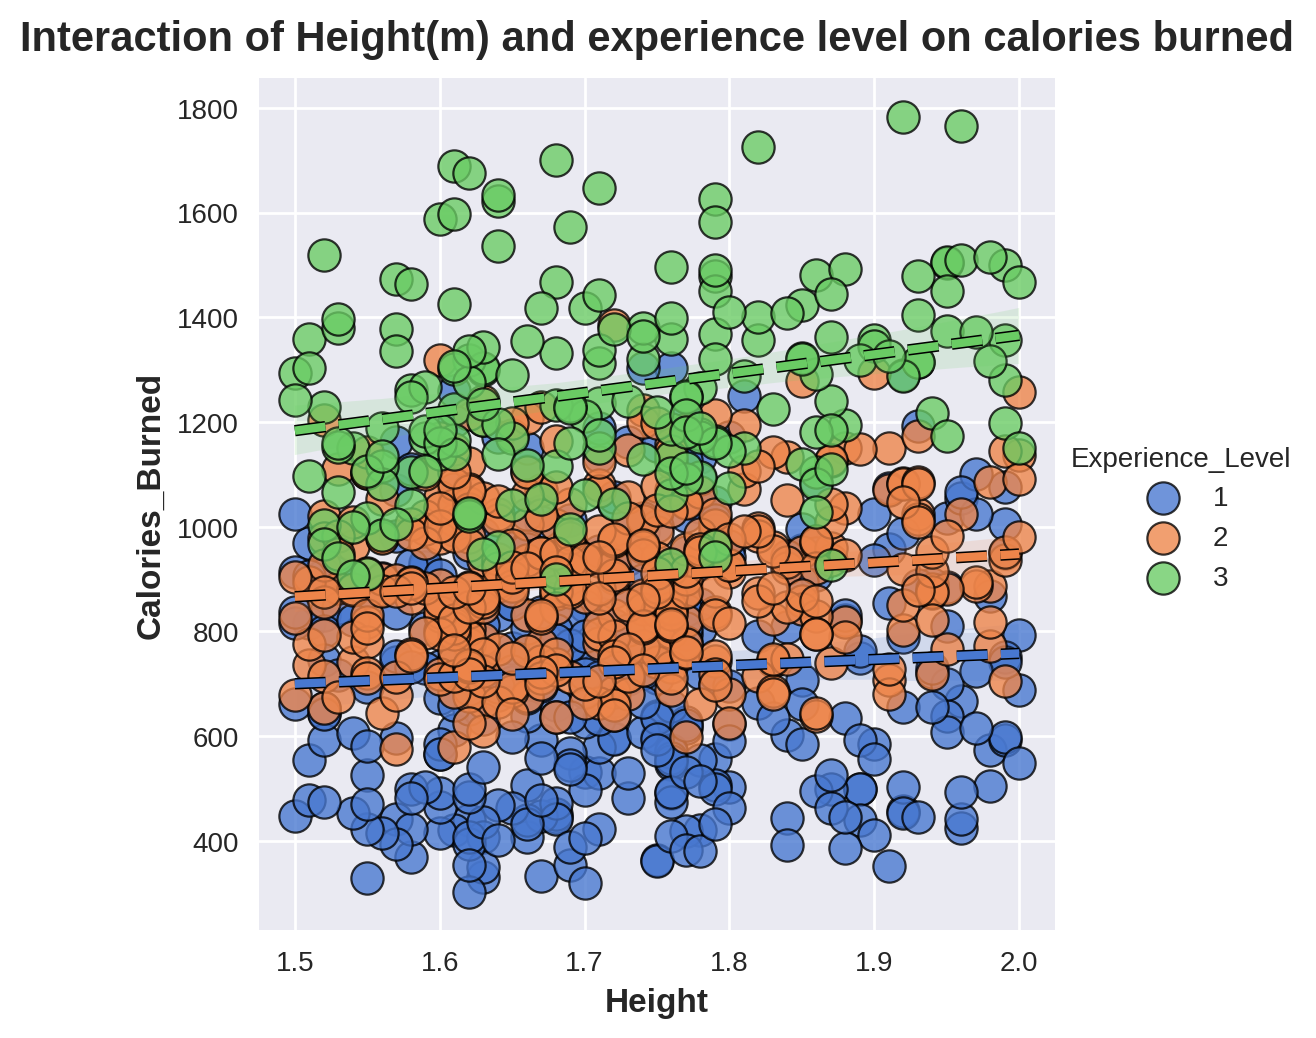

In [21]:
sns.lmplot(x='Height', y='Calories_Burned', hue='Experience_Level', palette='muted', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Height(m) and experience level on calories burned")
plt.show()

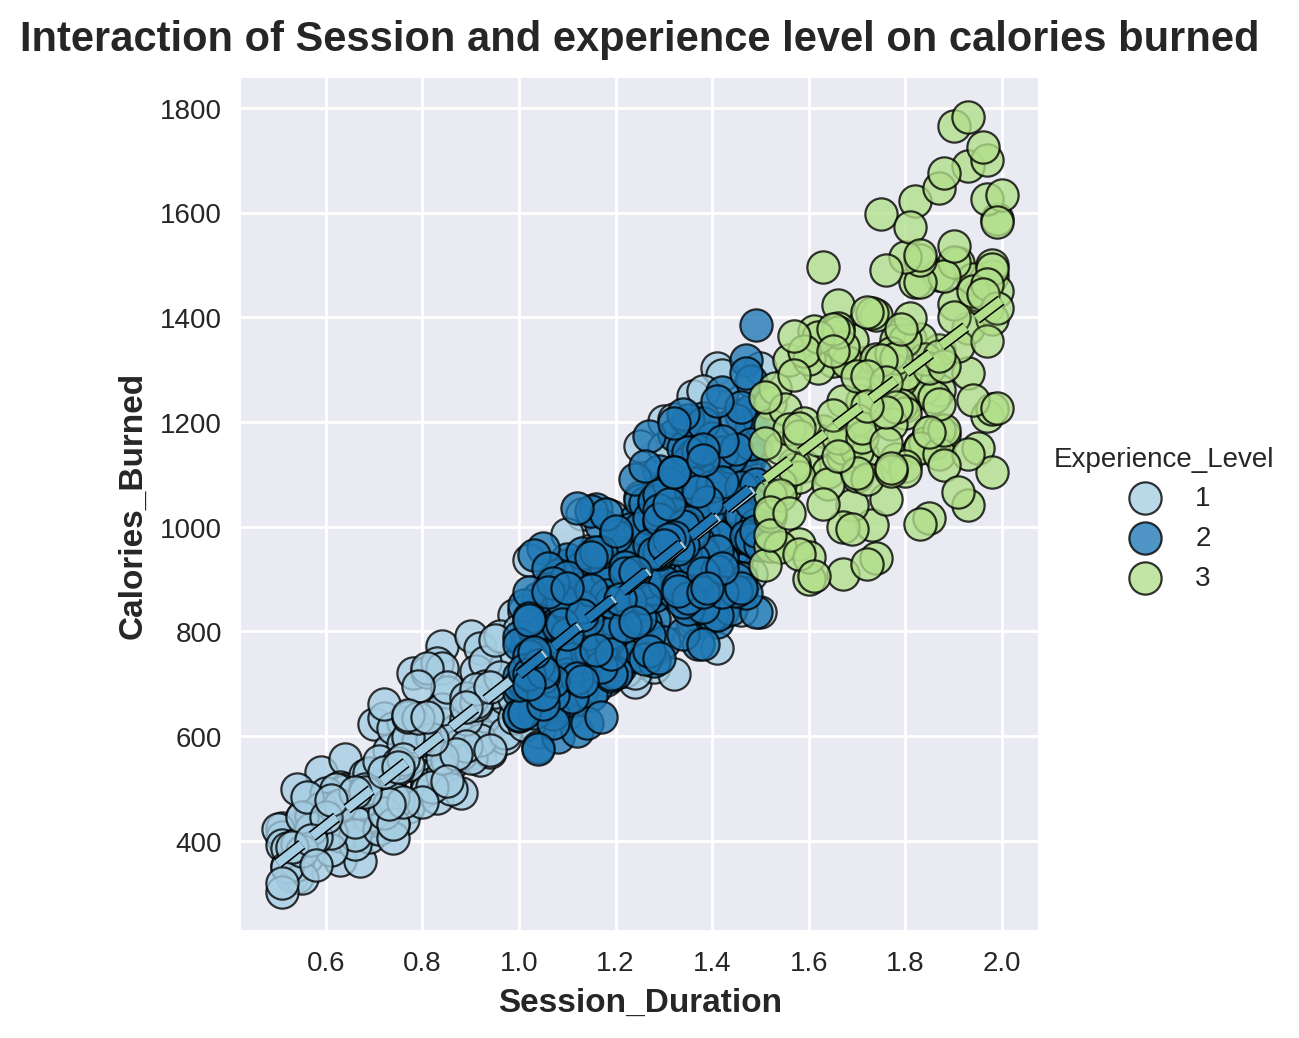

In [22]:
sns.lmplot(x='Session_Duration', y='Calories_Burned', hue='Experience_Level', palette='Paired', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Session and experience level on calories burned")
plt.show()

Since the lines are overlapping, there is no category effect of experience level on the relationship between session duration and calories burned. Therefore, the relationship between session duration and calories burned is consistent across all workout types.

In [23]:
df.columns

Index(['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Workout_Type',
       'Fat_Percentage', 'Water_Intake', 'Workout_Frequency',
       'Experience_Level', 'BMI'],
      dtype='object')

## Feature engineering

In [24]:
epsilon = 1e-6
df['BMI_experience'] = df['BMI'] * df['Experience_Level']
df['Weight_experience'] = df['Weight'] * df['Experience_Level']
df['Height_experience'] = df['Height'] * df['Experience_Level']
df['fat_experience'] = df['Fat_Percentage'] * df['Experience_Level']
df['experience_fat_ratio'] = df['Experience_Level'] / (df['Fat_Percentage'] + epsilon)
df['session_water'] = df['Session_Duration'] * df['Water_Intake']


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Workout_Type'] = le.fit_transform(df['Workout_Type'])


In [26]:
df.sample(5)

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
593   55       1   129.9    1.73      187      155           60   
773   58       1    90.2    1.72      199      150           55   
718   51       1   115.3    1.67      189      139           55   
947   25       0    62.6    1.65      174      142           61   
539   22       0    78.7    1.52      173      166           74   

     Session_Duration  Calories_Burned  Workout_Type  Fat_Percentage  \
593              0.69            529.0             3            21.7   
773              0.90            668.0             1            28.3   
718              1.38            950.0             3            24.4   
947              1.20            852.0             0            27.9   
539              1.45           1204.0             2            31.5   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  BMI_experience  \
593             2                  3                 1  43.40           43.40   
773             0                  2                 1  30.49           30.49   
718             1                  3                 2  41.34           82.68   
947             0                  3                 1  22.99           22.99   
539             1                  3                 2  34.06           68.12   

     Weight_experience  Height_experience  fat_experience  \
593              129.9               1.73            21.7   
773               90.2               1.72            28.3   
718              230.6               3.34            48.8   
947               62.6               1.65            27.9   
539              157.4               3.04            63.0   

     experience_fat_ratio  session_water  
593              0.046083           1.38  
773              0.035336           0.00  
718              0.081967           1.38  
947              0.035842           0.00  
539              0.063492           1.45

## Splitting the data into train and valid

In [27]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X.pop('Calories_Burned')
y = np.log(y)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=10)


## Using Label and Standard Encoders to preprocess the df

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor(n_estimators=200, random_state=10)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_valid)
rfr_fit = rfr.predict(X_train)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, rfr_fit)):,.5f}')
print(f'Valid RMSE: {np.sqrt(mean_squared_error(y_valid, rfr_pred)):,.5f}\n')
print(f'Train R2Score: {(r2_score(y_train, rfr_fit)):,.5f}')
print(f'Valid R2Score: {(r2_score(y_valid, rfr_pred)):,.5f}')



Train RMSE: 0.01824
Valid RMSE: 0.04765

Train R2Score: 0.99670
Valid R2Score: 0.98085
